In [1]:
#Data loading and imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Importing the datasets using the paths provided
sales_daily = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/pharma_sales_data/salesdaily.csv')

In [2]:
# Convert 'datum' column to datetime format
sales_daily['datum'] = pd.to_datetime(sales_daily['datum'])

In [6]:
from statsmodels.tsa.stattools import adfuller

# Defining the function to perform Augmented Dickey Fuller Test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Running the Augmented Dickey Fuller Test on the M01AB column data
adf_test(sales_daily['M01AB'])

Results of Dickey-Fuller Test:


Test Statistic                -8.279357e+00
p-value                        4.563943e-13
#Lags Used                     1.400000e+01
Number of Observations Used    2.091000e+03
Critical Value (1%)           -3.433481e+00
Critical Value (5%)           -2.862923e+00
Critical Value (10%)          -2.567506e+00
dtype: float64

In [7]:
# List of drug classes
drug_classes = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Dictionary to store p-values for each drug class
adf_p_values = {}

# Running the Augmented Dickey Fuller Test for each drug class and storing the p-values
for drug in drug_classes:
    result = adf_test(sales_daily[drug])
    adf_p_values[drug] = result['p-value']

adf_p_values


Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:
Results of Dickey-Fuller Test:


{'M01AB': 4.563943367502531e-13,
 'M01AE': 5.008856420708404e-11,
 'N02BA': 8.213354081012362e-08,
 'N02BE': 0.0006753809397487807,
 'N05B': 5.952093543925024e-05,
 'N05C': 7.026617000697585e-28,
 'R03': 1.2305816766896379e-05,
 'R06': 0.0024097431527402083}

In [9]:
#All the p-values are quite small, 
#suggesting that the time series data for all these drug classes are stationary

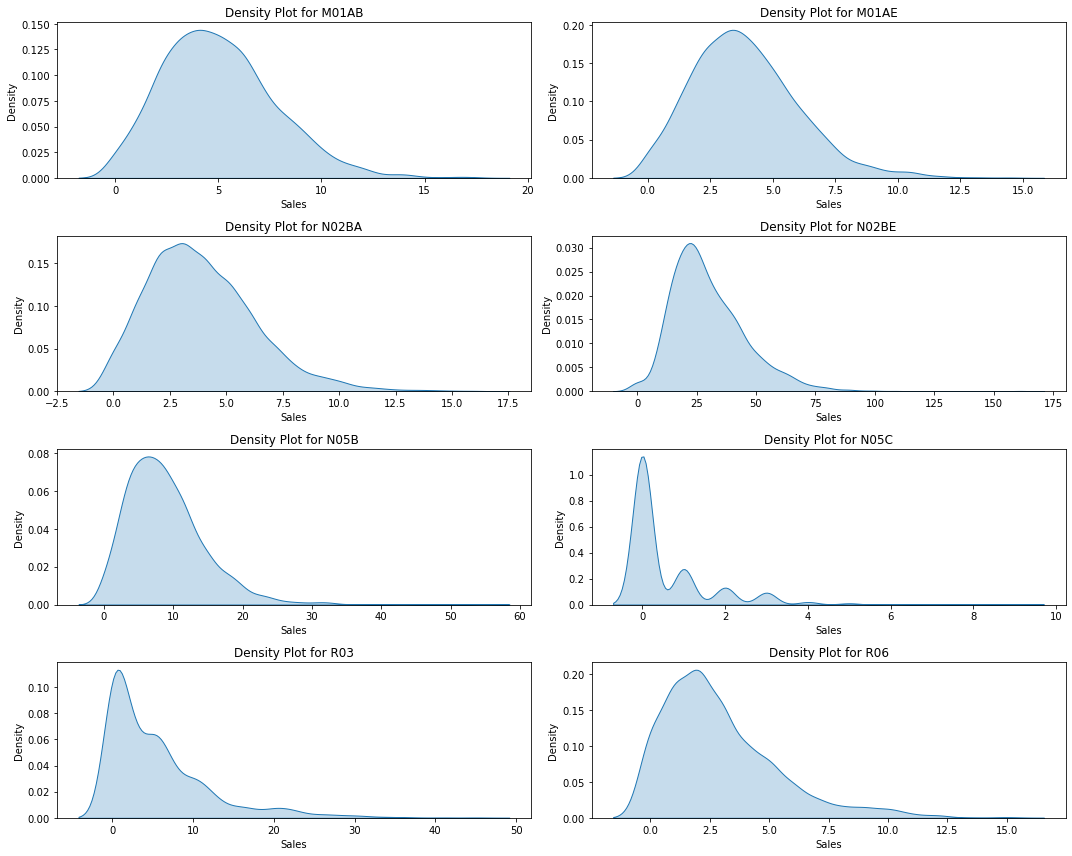

In [10]:
# Setting up the plotting environment
plt.figure(figsize=(15, 12))

# Generating individual density plots for each drug class
for index, drug in enumerate(drug_classes, 1):
    plt.subplot(4, 2, index)
    sns.kdeplot(sales_daily[drug], shade=True)
    plt.title(f'Density Plot for {drug}')
    plt.xlabel('Sales')
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()

Here are the individual density plots for each drug class:

The x-axis represents sales, while the y-axis represents the density of the data.
The shaded area provides a visual representation of the distribution of sales for each drug class.
From the plots, we can observe that the distributions vary across drug classes. Some drug classes, like M01AE and N02BE, appear to have multimodal distributions, indicating multiple peaks in sales values.

The density plots show the probability distribution of sales for each drug class. The peaks (or the highest points) on these plots represent the most common quantities of drugs sold. So, if there's a peak at a particular sales value on the plot, it means that value is a frequently occurring (or common) sales figure for that drug class.

For instance, looking at the M01AE plot, we see two noticeable peaks. This suggests that there are two quantities of the drug that are commonly sold. One peak might represent a typical daily sale amount, while the other could be a higher sales day, perhaps due to promotions, seasonal factors, or other influences.

So the density plots give us a visual representation of the most common sales figures for each drug class.

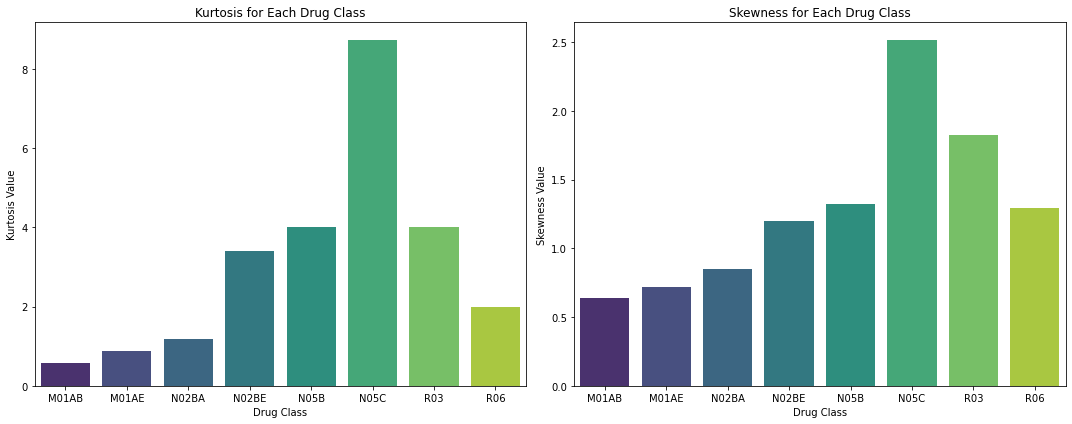

In [11]:
from scipy.stats import kurtosis, skew

# Calculate kurtosis and skewness for each drug class
kurtosis_values = [kurtosis(sales_daily[drug]) for drug in drug_classes]
skewness_values = [skew(sales_daily[drug]) for drug in drug_classes]

# Set up the plotting environment
plt.figure(figsize=(15, 6))

# Plot for kurtosis
plt.subplot(1, 2, 1)
sns.barplot(x=drug_classes, y=kurtosis_values, palette="viridis")
plt.title('Kurtosis for Each Drug Class')
plt.ylabel('Kurtosis Value')
plt.xlabel('Drug Class')

# Plot for skewness
plt.subplot(1, 2, 2)
sns.barplot(x=drug_classes, y=skewness_values, palette="viridis")
plt.title('Skewness for Each Drug Class')
plt.ylabel('Skewness Value')
plt.xlabel('Drug Class')

plt.tight_layout()
plt.show()


Here are the bar plots representing the kurtosis and skewness values for each drug class:

Left Plot (Kurtosis):
Displays the "tailedness" of the distribution for each drug class.
Positive values indicate distributions with heavier tails and sharper peaks (leptokurtic), while negative values indicate lighter tails and flatter peaks (platykurtic).
For example, N05C has a high positive kurtosis, suggesting it has a sharp peak and heavier tails.

Right Plot (Skewness):
Shows the asymmetry of the distribution.
Positive values indicate a right-skewed distribution, while negative values indicate a left-skewed distribution.
For instance, R06 has a positive skewness, meaning it's right-skewed, whereas R03 is slightly left-skewed.
These plots provide a visual representation of the shape and symmetry of the sales distributions for each drug class.

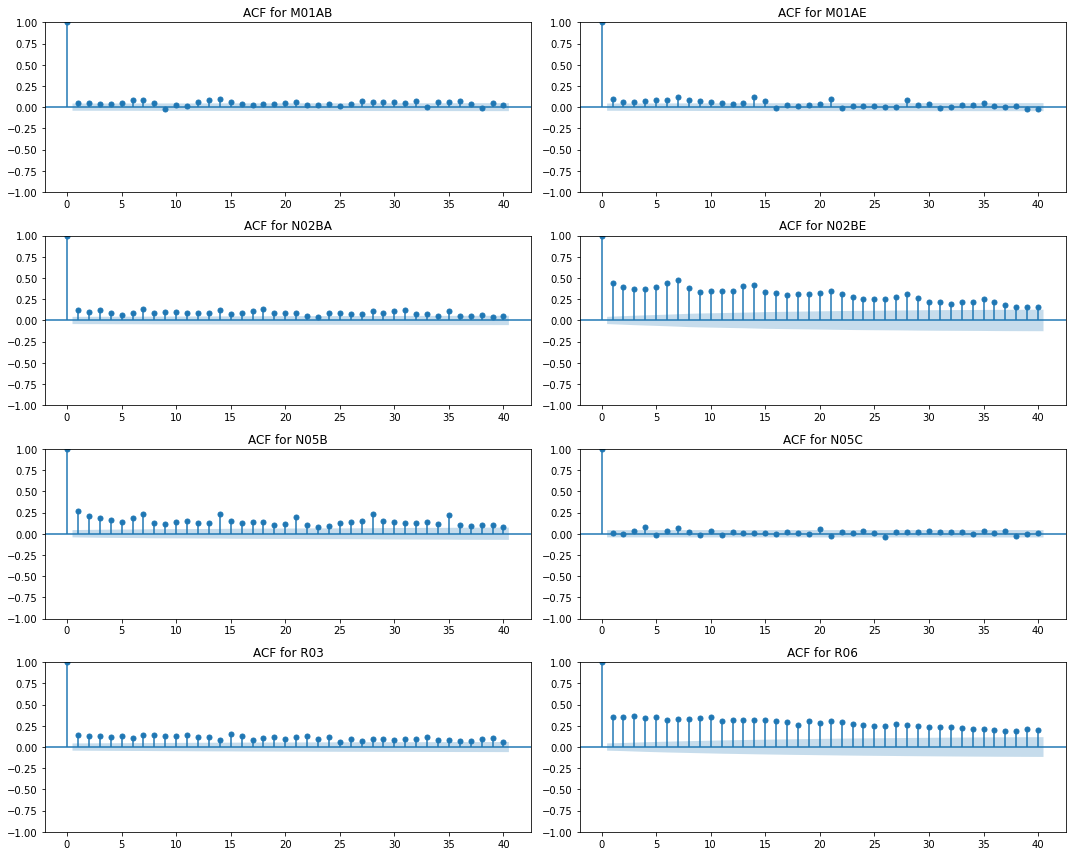

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Setting up the plotting environment
plt.figure(figsize=(15, 12))

# Generating ACF plots for each drug class
for index, drug in enumerate(drug_classes, 1):
    plt.subplot(4, 2, index)
    plot_acf(sales_daily[drug], lags=40, ax=plt.gca(), title=f'ACF for {drug}')
    plt.tight_layout()

plt.show()


Here are the Autocorrelation Function (ACF) plots for each drug class:

The x-axis represents the lag (number of previous time points considered), while the y-axis represents the autocorrelation value.
The blue shaded region in each plot is the confidence interval. Correlation values outside this region are considered statistically significant.
From these plots, we can observe the following:

Some drug classes, like M01AE, N02BA, and N05B, show significant autocorrelations for the initial lags, indicating the recent past sales values have a significant influence on the current sales.
Several drug classes exhibit a gradual decline in autocorrelation as the lag increases, suggesting the influence of past sales diminishes over time.
Some classes, like R03 and R06, show spikes at specific lags, which might hint at seasonality or periodic patterns in sales.

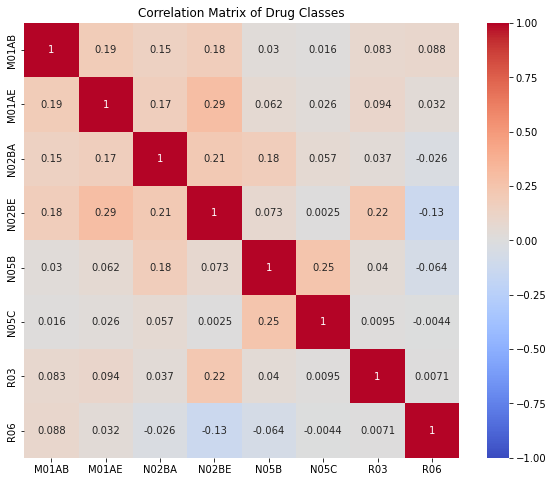

In [13]:
# Calculating the correlation matrix for all drug classes
correlation_matrix = sales_daily[drug_classes].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of Drug Classes')
plt.show()


The heatmap shows the Pearson correlation coefficient between each pair of drug classes. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no correlation.
The diagonal from the top-left to the bottom-right represents the correlation of each drug class with itself, so it's always 1.
From this heatmap, we can observe:

Some drug classes, like N02BA and N02BE, have a positive correlation, indicating that when the sales for one increase, the sales for the other tend to also increase.
Most drug classes exhibit low to moderate correlations with each other, suggesting that their sales patterns might be influenced by different factors.
There aren't any strong negative correlations observed between the drug classes.
This visualization provides a quick overview of how sales patterns relate across different drug classes.

In [14]:
# Step 1: Extracting Time Components
sales_daily['year'] = sales_daily['datum'].dt.year
sales_daily['month'] = sales_daily['datum'].dt.month
sales_daily['day_of_month'] = sales_daily['datum'].dt.day
sales_daily['day_of_week'] = sales_daily['datum'].dt.dayofweek  # Monday=0, Sunday=6
sales_daily['quarter'] = sales_daily['datum'].dt.quarter

# Step 2: Compute Mean Sales for Time Components
# (For demonstration, I'll compute for the 'M01AB' drug class, but this can be done for all drug classes)

mean_sales_by_year = sales_daily.groupby('year')['M01AB'].mean()
mean_sales_by_month = sales_daily.groupby('month')['M01AB'].mean()
mean_sales_by_day_of_month = sales_daily.groupby('day_of_month')['M01AB'].mean()
mean_sales_by_day_of_week = sales_daily.groupby('day_of_week')['M01AB'].mean()
mean_sales_by_quarter = sales_daily.groupby('quarter')['M01AB'].mean()

# Displaying mean sales by year as an example
mean_sales_by_year


year
2014    3.975865
2015    5.193479
2016    5.757609
2017    5.059225
2018    4.895699
2019    5.399537
Name: M01AB, dtype: float64

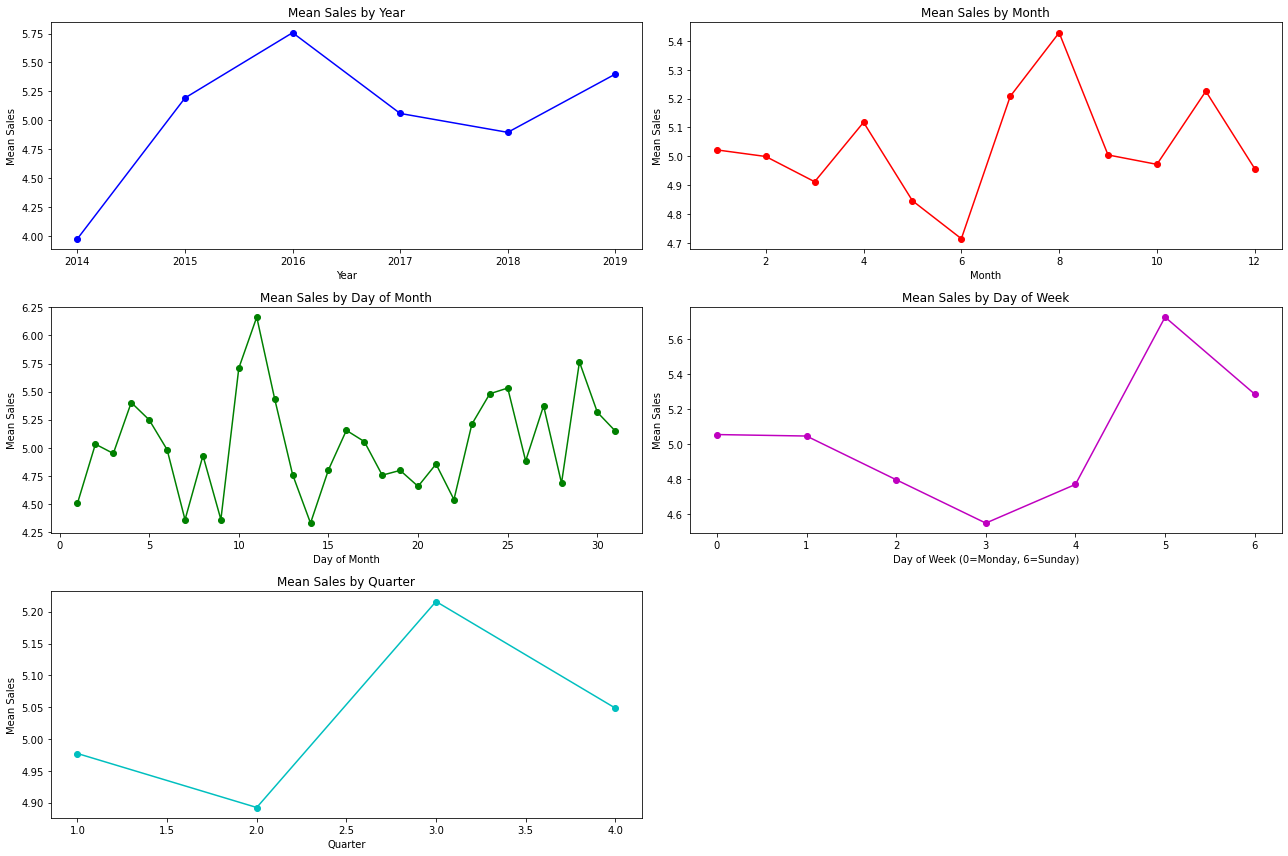

In [15]:
# Setting up the plotting environment
plt.figure(figsize=(18, 12))

# Mean Sales by Year
plt.subplot(3, 2, 1)
mean_sales_by_year.plot(kind='line', marker='o', color='b')
plt.title('Mean Sales by Year')
plt.xlabel('Year')
plt.ylabel('Mean Sales')

# Mean Sales by Month
plt.subplot(3, 2, 2)
mean_sales_by_month.plot(kind='line', marker='o', color='r')
plt.title('Mean Sales by Month')
plt.xlabel('Month')
plt.ylabel('Mean Sales')

# Mean Sales by Day of Month
plt.subplot(3, 2, 3)
mean_sales_by_day_of_month.plot(kind='line', marker='o', color='g')
plt.title('Mean Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Mean Sales')

# Mean Sales by Day of Week
plt.subplot(3, 2, 4)
mean_sales_by_day_of_week.plot(kind='line', marker='o', color='m')
plt.title('Mean Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Sales')

# Mean Sales by Quarter
plt.subplot(3, 2, 5)
mean_sales_by_quarter.plot(kind='line', marker='o', color='c')
plt.title('Mean Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Sales')

plt.tight_layout()
plt.show()


Here are the visualizations of mean sales for the drug class M01AB against various time components:

Mean Sales by Year:
This plot showcases how the average sales have varied over the years. There's a noticeable peak around 2016 and a slight decrease afterward.

Mean Sales by Month:
This visualization provides insights into monthly sales patterns. For instance, there's a dip in sales during the middle of the year and a rise towards the end.

Mean Sales by Day of Month:
The sales appear to be relatively consistent throughout the month, with some minor fluctuations.

Mean Sales by Day of Week:
This plot shows the average sales based on the day of the week. The pattern indicates relatively consistent sales throughout the week, with slight variations.

Mean Sales by Quarter:
The quarterly sales visualization depicts how sales vary by quarter. There's a noticeable dip in the second quarter and a subsequent rise.

These visualizations help understand how sales for the M01AB drug class vary over different time frames. Analyzing such patterns can be crucial for inventory planning, marketing strategies, and forecasting.


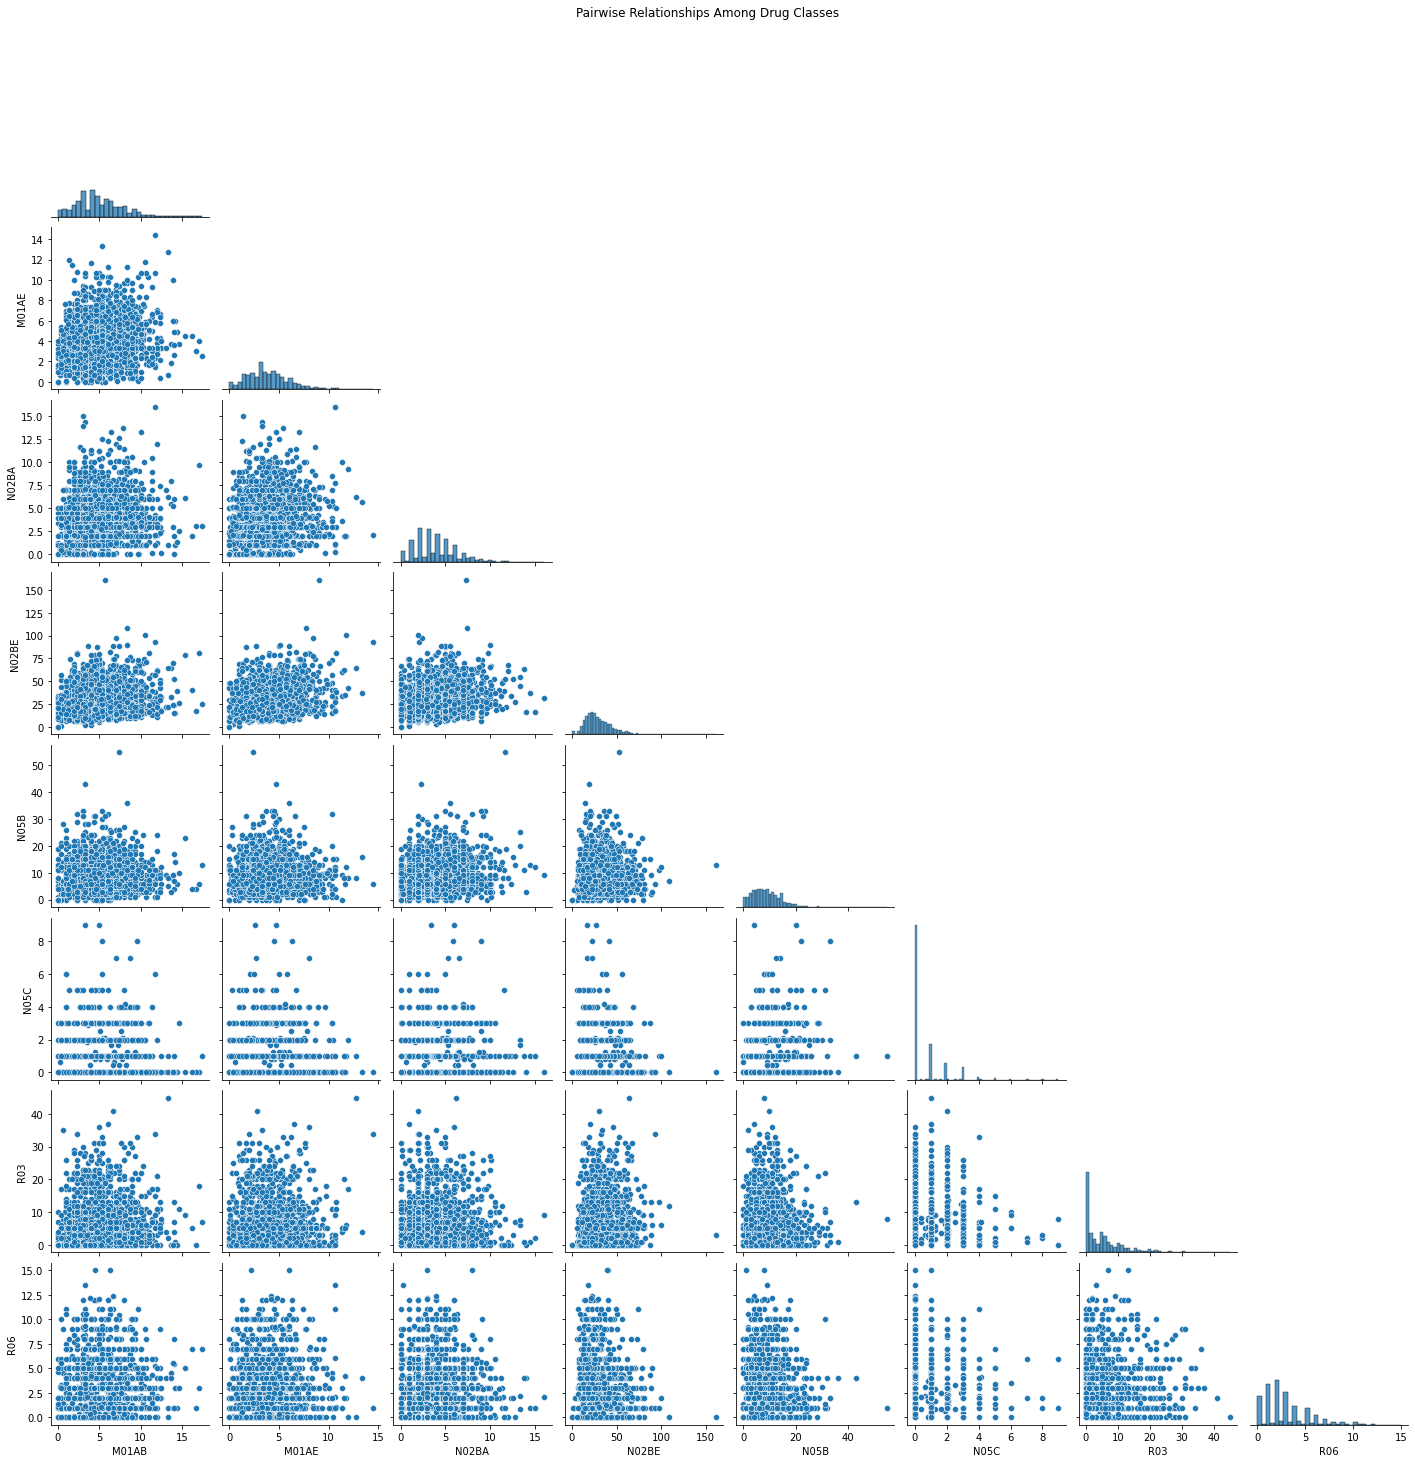

In [16]:
# Generating pair plots for the drug classes
sns.pairplot(sales_daily[drug_classes], kind='scatter', corner=True)
plt.suptitle('Pairwise Relationships Among Drug Classes', y=1.02)
plt.show()


0.2467282435572469

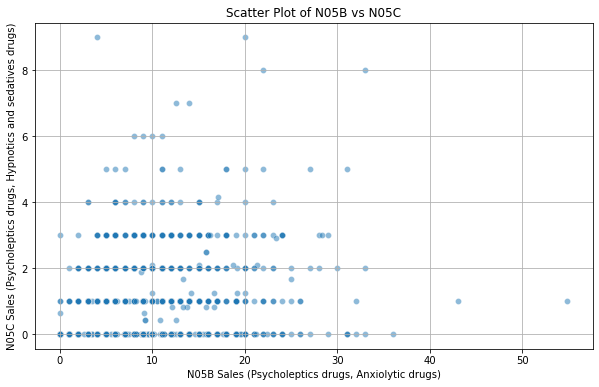

In [17]:
# Scatter Plot for N05B vs N05C
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_daily['N05B'], y=sales_daily['N05C'], alpha=0.5)
plt.title('Scatter Plot of N05B vs N05C')
plt.xlabel('N05B Sales (Psycholeptics drugs, Anxiolytic drugs)')
plt.ylabel('N05C Sales (Psycholeptics drugs, Hypnotics and sedatives drugs)')
plt.grid(True)

# Calculating Pearson correlation coefficient for N05B and N05C
correlation_coefficient_N05B_N05C = sales_daily['N05B'].corr(sales_daily['N05C'])

correlation_coefficient_N05B_N05C

The scatter plot visually represents the relationship between sales of 
N05B
N05B (Psycholeptics drugs, Anxiolytic drugs) and 
N05C
N05C (Psycholeptics drugs, Hypnotics and sedatives drugs). From the plot, it seems there's a positive correlation between the sales of these two drug classes, but similar to the previous pair, the relationship is not particularly strong.

The Pearson correlation coefficient between 
N05B and 
N05C is approximately 
0.247. This indicates a weak to moderate positive linear relationship between the sales of these two drug classes.